Algumas ideias pra melhorar esse notebook:
- https://www.scientificamerican.com/article/explore-175-years-of-words-in-scientific-american/ e https://www.scientificamerican.com/article/how-to-turn-175-years-of-words-in-scientific-american-into-an-image/
- https://infovis.fh-potsdam.de/tutorials/infovis5text.html
- https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
leis = pd.read_json('leis.json')
leis.drop(['documento'], inplace=True, axis=1)
print(leis.info())
print(leis.nunique())
leis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6033 entries, 0 to 6032
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   titulo     6033 non-null   object
 1   categoria  6033 non-null   object
 2   resumo     6033 non-null   object
 3   texto      6033 non-null   object
dtypes: object(4)
memory usage: 188.7+ KB
None
titulo       6033
categoria       8
resumo       4961
texto        6029
dtype: int64


,titulo,categoria,resumo,texto
0,"DECRETO Nº 8854, de 28 de fevereiro de 2013.",Decretos,DELEGA COMPETÊNCIA À SECRETARIA MUNICIPAL DE P...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
1,"DECRETO Nº 8849, de 25 de fevereiro de 2013.",Decretos,ABRE CRÉDITO SUPLEMENTAR AO ORÇAMENTO DO MUNIC...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
2,"DECRETO Nº 8853, de 27 de fevereiro de 2013.",Decretos,NOMEIA MEMBROS DO CONSELHO MUNICIPAL DE DESENV...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
3,"DECRETO Nº 8967, de 17 de julho de 2013",Decretos,ALTERA O QUADRO DE DETALHAMENTO DE DESPESA DO ...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
4,"DECRETO Nº 8982, de 30 de julho de 2013",Decretos,AUTORIZA O FUNCIONAMENTO DE ESTABELECIMENTOS C...,"O PREFEITO MUNICIPAL DE FEIRA DE SANTANA, Esta..."
...,...,...,...,...
6028,RESOLUÇÃO Nº 125/1980,Resoluções,DISPÕE SOBRE A CONCESSÃO DE TÍTULO DE CIDADÃO ...,Faço saber que a Câmara Municipal aprovou e eu...
6029,RESOLUÇÃO Nº 403/2003,Resoluções,AUTORIZA A MESA DIRETIVA DO PODER LEGISLATIVO ...,"A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado..."
6030,RESOLUÇÃO Nº 492/2014,Resoluções,INSTITUI A SEGUNDA SEMANA DO MÊS DE AGOSTO EM ...,"A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado..."
6031,RESOLUÇÃO Nº 382/2001,Resoluções,CRIA A MEDALHA VEREADOR DIVAL FIGUEIREDO MACHA...,"A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado..."


In [3]:
leis.iloc[len(leis)-1, 3]

'A CÂMARA MUNICIPAL DE FEIRA DE SANTANA, Estado da Bahia, na conformidade do artigo 70, Inciso V, da Lei Municipal nº37, de 05 de Abril de 1990 e, artigos 287, § 2º e, 420, do Regimento Interno, promulga a seguinte Resolução:\n\nArt. 1ºDê-se aos dispositivos abaixo mencionados, da Resolução nº393/2002 - Regimento Interno, as seguintes redações:\n\n"Art. 7º A Mesa Diretora da Câmara compor-se-á do Presidente, Primeiro e Segundo Secretários, com mandato de 02 ( dois ) anos, admitida a recondução para a eleição subsequente.\n\n§ 4º Se, hora regimental, não estiver presente o Presidente, abrirá os trabalhos o Vice-Presidente ou, na falta deste, o Primeiro ou Segundo Secretários, na sequência, ou ainda, caso estes não estejam presentes, o Vereador mais votado nas eleições municipais."\n\n"Art. 33 Compete, privativamente, ao Vice-Presidente:"\n\n"Art. 36 ...\n\nI - ...\n\ne) acompanhar e supervisionar a Ata da Sessão, proceder a sua leitura e assiná-la depois do Presidente e do Vice-Presiden

In [4]:
from nltk.corpus import stopwords
import re
import unicodedata

def limpa_texto(text, string=True) -> str or list:
    if (type(text) == float):
        return ''

    # Remove pontuacao, digitos e espacos
    text = ' '.join(re.findall(r'\b[a-zÀ-ú]+\b', text.lower()))
    
    # Remove acentos, cedilhas etc
    nfkd_form = unicodedata.normalize('NFKD', text)
    text = ''.join([char for char in nfkd_form if not unicodedata.combining(char)])

    # Remove stopwords
    my_stopwords = stopwords.words('portuguese')
    my_words = ['feira', 'santana', 'art', 'municipal', 'lei', 'r', 
    'prefeito', 'câmara', 'municipio', 'data', 'seguinte', 'disposições',
    'estado', 'bahia', 'vigor', 'secretário', 'decreto', 'projeto', 
    'iii', 'i', 'ii',  'contrário', 'presidente', 'artigo',
    'faço', 'parágrafo', 'executivo', 'gabinete', 'único', 'sanciono', 
    'desta', 'v', 'iv', 'autoria', 'através', 'deste', 'vice', 'autor',
    'qualquer', 'b', 'decretou', 'execução', 'sobre', 'das', 'decorrentes',
    'decreta', 'resolução', 'geral', 'uso', 'ato', 'diretiva', 'exercício',
    'seguintes', 'meio', 'm', 'c', 'correrão']
    my_stopwords = my_stopwords + my_words

    text = [word for word in text.split() if word not in my_stopwords]

    if string:
        return ' '.join(text)
    else:
        return text

In [5]:
# Do campo texto, transforma pra minusculo e remove pontuacao
texto = ' '.join(leis['texto'].tolist())
texto = limpa_texto(texto, string=False)

num_palavras_unicas = len(set(texto))
print(f'Numero de palavras unicas no texto: {num_palavras_unicas}')

Numero de palavras unicas no texto: 28892


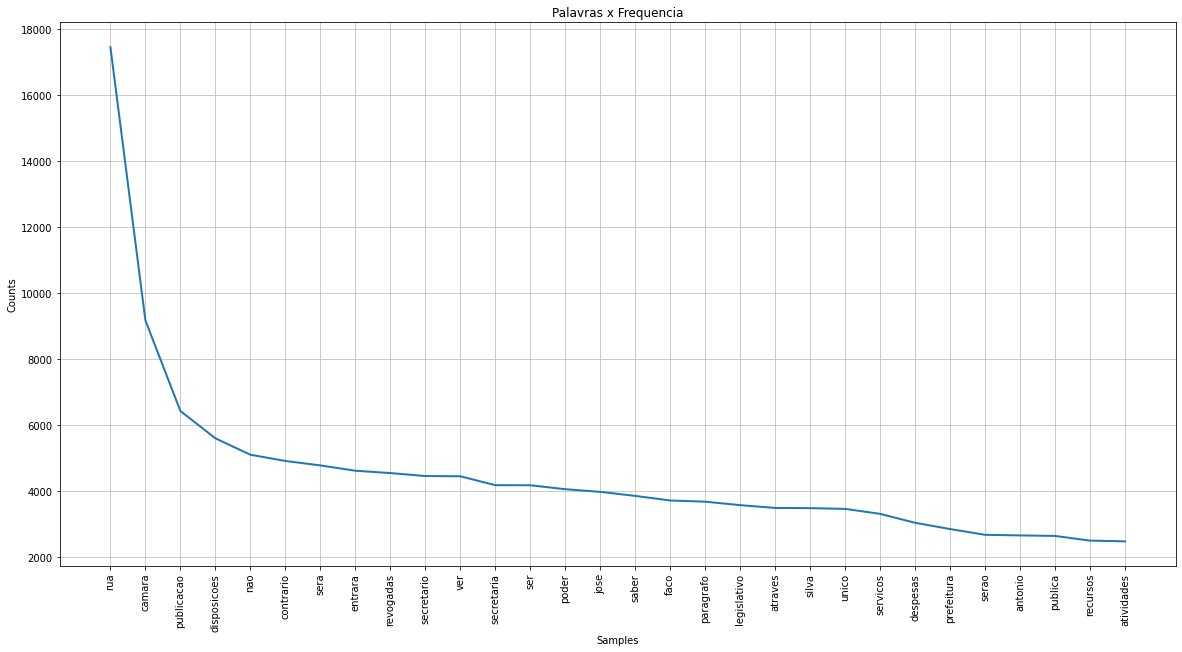

In [13]:
from nltk import FreqDist

plt.figure(figsize=(20,10))
fd = FreqDist(texto)
fd.plot(30, title='Palavras x Frequencia', cumulative=False)